In [2]:
# Install a pip package in the current Jupyter kernel
import sys
!{sys.executable} -m pip install numpy

# Pandas Test - Real life exercise

In [3]:
import pandas as pd

For visualizations:

In [4]:
import cufflinks as cf; cf.go_offline()
import plotly_express as px

## About the data

The data you are about to load is coming from an Ad recommentation system of the company InBrain. InBrain is a adTech company and specalize in next-level ad recommendation.  
The company has two major products - one giving high quality recommendation while the other is giving an highly yielding recommendation. Inbrain custormers are sending requests, asking for either of the products. 

Once a week, the company is doing an internal quality assements, and sends a sample of its traffic requests to external annotation process, in which the annotators are trained to manually decided whether the recommended Ad is a succes or not. The data contains information about the ad (**ad_id**), the sampled week (**week_id**), the requester company (**requester**), the region of operation (**region**), the recommendation type (Quality/Yield, **recommendation_type**) and the recommendation provider algorithm (**rec_provider**). The annotators are marking whether the recommendation is meeting the Quality/Yield standards (**is_success**) and whether or not the recommendation is severly defected (**is_sever**)

See a sample below:

In [5]:
ad_recs_annotated = pd.read_csv('data/ad_annotations.csv')
ad_recs_annotated.sample(5)

week_id       ad_id        requester region is_success is_sever  \
279399  2022-week_01  AD08V7F6WN  Puentes Company     IN        yes      NaN   
194796  2021-week_46  AD08CNC9F9  Puentes Company     IN         no     True   
243683  2021-week_49  AD0798V8SD       Extreme DA     US        yes      NaN   
228546  2021-week_48  AD08X8QW9W       Extreme DA     US        yes      NaN   
21319   2021-week_34  AD08PZ96F8  Puentes Company     IN        yes      NaN   

       recommendation_type rec_provider  
279399               Yield   RuleBasedY  
194796               Yield     UserPopY  
243683               Yield     UserPopY  
228546               Yield         DNNY  
21319                Yield      ManualQ

Your job, as the new and only data scientist of the company, is to get familiar with the the data, show week-over-week trends and produce insightfull graphs as a preparation to a full blown BI dashboard.

## Questions

### Data Modifications

* Add a column with the sample year
* Add a column with the sample quarter (google how to)
* Add a new success column with values 1 and 0 for yes and no 
* Are there duplicated ads? To compac the data, remove duplicated ads and instead add an ad_count column **(pay attention, this is not trivial at all)**
* Are there any NaNs in the is_sever column? Count how many and create a new column with NaNs filled as False. Check that indeed the new column contaion no NaNs. 
* Capitlize (first letter only) the is_success column

In [9]:
ad_recs_annotated.head()

week_id       ad_id               requester region is_success  \
0  2021-week_33   AD0088VOS  Search Million Culture     DE        yes   
1  2021-week_33  AD07KYS8JM   MoJoe Brewing Company     DE        yes   
2  2021-week_33  AD08PDP6Y9  Search Million Culture     DE        yes   
3  2021-week_33  AD89608808  Search Million Culture     DE        yes   
4  2021-week_33  AD07CMVHP6  Search Million Culture     DE        yes   

  is_sever recommendation_type rec_provider  year  
0      NaN              Qality         DNNQ  2021  
1      NaN               Yield         DNNY  2021  
2      NaN              Qality         DNNQ  2021  
3      NaN              Qality       BooksQ  2021  
4      NaN              Qality         DNNQ  2021

In [7]:
ad_recs_annotated['year'] = ad_recs_annotated['week_id'].str[:4]

In [8]:
    ad_recs_annotated['quarter'] = ad_recs_annotated['week_id'].dt.quarter

AttributeError: Can only use .dt accessor with datetimelike values

In [16]:
ad_recs_annotated['is_success_int'] =  ad_recs_annotated.is_success.map({'yes':1,'no':0}) 
ad_recs_annotated.is_success_int

0         1
1         1
2         1
3         1
4         1
         ..
373783    1
373784    1
373785    1
373786    1
373787    1
Name: is_success_int, Length: 373788, dtype: int64

In [17]:
ad_recs_annotated.is_sever.isnull().sum()
ad_recs_annotated[ad_recs_annotated.is_sever.notnull()].is_success.value_counts()
ad_recs_annotated['is_sever_fixed'] = ad_recs_annotated.is_sever.fillna(False)
ad_recs_annotated['is_sever_fixed'].isnull().sum()
ad_recs_annotated.is_sever_fixed.value_counts(dropna=False)

False    329099
True      44689
Name: is_sever_fixed, dtype: int64

In [18]:
ad_recs_annotated['is_success'] = ad_recs_annotated.is_success.apply(lambda successStatus: successStatus.capitalize())
ad_recs_annotated.is_success

0         Yes
1         Yes
2         Yes
3         Yes
4         Yes
         ... 
373783    Yes
373784    Yes
373785    Yes
373786    Yes
373787    Yes
Name: is_success, Length: 373788, dtype: object

### Subset selection

for each question, sub-select the data by using the conditional selection (`[]`) and the `.query` API. Use `.shape` on the subselection to obtain the result.  
For example:
`df.query('some_condition').shape`

1. How many requests are there in US region? 
1. How many **successful** requests are there in US region? 
1. How many **successful** requests are there in US region, on week 52?
1. How many requests where delivered by DDNQ, RRNY and UserPopQ together? 
1. How many requests where delivered by rule based providers? 
1. Select only the requests from 2021 - How many are there? 
1. Select the reqeusts from week 30 to week 40 - How many are there? 
1. Select all the data that comes from the most popular Ad
1. Select all the data that comes from the least popular provider
1. Select the data in which is_sever is None. How big is it? 
1. Select the data in which the requester is a 3 word company
1. Select the data in which the requester is a 3 word company, and the ad_id has the letter 6 in it
1. Select the data in which the requester is a 3 word company, and the multiplication of all the numbers in the ad_id is bigger than 30

In [20]:
ad_recs_annotated.query('region == "US"').shape[0]

103846

In [21]:
ad_recs_annotated[(ad_recs_annotated['region'] == 'US') & (ad_recs_annotated['is_success'] == 'Yes')].shape[0]

88918

In [24]:
ad_recs_annotated["week_number"] = ad_recs_annotated.week_id.apply(lambda week:int(week.split('_')[1]))
ad_recs_annotated.query("region == 'US' and is_success == 'Yes' and week_number == 52 ").shape[0]


3342

In [25]:
rec_providers = ['DNNQ','RNNY','UserPopQ']
ad_recs_annotated[ad_recs_annotated['rec_provider'].isin(rec_providers)].shape[0]

200093

In [26]:
rec_providers_by_rule = ['RuleBased','RuleBasedY']
ad_recs_annotated[ad_recs_annotated['rec_provider'].isin(rec_providers_by_rule)].shape[0]

28336

In [29]:
ad_recs_annotated[ad_recs_annotated['year'] == '2021'].shape[0]
ad_recs_annotated.head()


week_id       ad_id               requester region is_success  \
0  2021-week_33   AD0088VOS  Search Million Culture     DE        Yes   
1  2021-week_33  AD07KYS8JM   MoJoe Brewing Company     DE        Yes   
2  2021-week_33  AD08PDP6Y9  Search Million Culture     DE        Yes   
3  2021-week_33  AD89608808  Search Million Culture     DE        Yes   
4  2021-week_33  AD07CMVHP6  Search Million Culture     DE        Yes   

  is_sever recommendation_type rec_provider  year  is_success_int  \
0      NaN              Qality         DNNQ  2021               1   
1      NaN               Yield         DNNY  2021               1   
2      NaN              Qality         DNNQ  2021               1   
3      NaN              Qality       BooksQ  2021               1   
4      NaN              Qality         DNNQ  2021               1   

   is_sever_fixed  week_number  
0           False           33  
1           False           33  
2           False           33  
3           False           33  
4           False           33

In [30]:
ad_recs_annotated[(ad_recs_annotated['week_number'] >= 30) & (ad_recs_annotated['week_number'] <= 40)].shape[0]

115051

In [33]:
most_popular_ad = ad_recs_annotated.requester.value_counts().sort_values(ascending=False).index[0]
all_data_of_most_popular_ad = ad_recs_annotated[ad_recs_annotated["requester"] == most_popular_ad]
all_data_of_most_popular_ad = ad_recs_annotated.query("requester == @most_popular_ad")

In [35]:
least_popular_provider = ad_recs_annotated.rec_provider.value_counts().sort_values(ascending=True).index[0]
all_data_of_least_popular_provider = ad_recs_annotated[ad_recs_annotated['rec_provider'] == least_popular_provider]
all_data_of_least_popular_provider = ad_recs_annotated.query("rec_provider == @least_popular_provider")

In [36]:
all_data_which_is_server_None = ad_recs_annotated[ad_recs_annotated.is_sever.isnull()]
all_data_which_is_server_None.shape[0]

304195

In [40]:
def request_3_words(requester):
    return len(requester.split(' ') ) == 3

In [41]:
three_words_requesters = ad_recs_annotated[ad_recs_annotated.requester.apply(request_3_words)]
three_words_requesters.sample(5)

week_id       ad_id               requester region is_success  \
17494   2021-week_34  AD09888ZKW  Search Million Culture     GB        Yes   
87514   2021-week_39  AD08886D6T   MoJoe Brewing Company     DE        Yes   
1792    2021-week_33  AD07PKP8MY  Search Million Culture     DE        Yes   
250318  2021-week_50  AD07FG7XPC   MoJoe Brewing Company     IN        Yes   
82005   2021-week_38  AD089Q88ZN  Search Million Culture     JP        Yes   

       is_sever recommendation_type rec_provider  year  is_success_int  \
17494       NaN              Qality         XGBQ  2021               1   
87514       NaN               Yield         DNNY  2021               1   
1792        NaN              Qality     UserPopQ  2021               1   
250318      NaN               Yield     UserPopY  2021               1   
82005       NaN              Qality         DNNQ  2021               1   

        is_sever_fixed  week_number  
17494            False           34  
87514            False           39  
1792             False           33  
250318           False           50  
82005            False           38

In [46]:
def is_ad_id_six(ad_id):
    return '6' in ad_id

In [53]:
six_letter_three_words = ad_recs_annotated[
                            (ad_recs_annotated.requester.apply(request_3_words)) & 
                            (ad_recs_annotated.ad_id.apply(is_ad_id_six))]
six_letter_three_words.sample(8)


week_id       ad_id               requester region is_success  \
75751   2021-week_38  AD09F69KZ8  Search Million Culture     GB        Yes   
148666  2021-week_43  AD008HPAE6  Search Million Culture     GB        Yes   
110379  2021-week_40  AD0969L9D8  Search Million Culture     JP         No   
281739  2022-week_01  AD08P6ZSXW  Search Million Culture     JP        Yes   
242519  2021-week_49  AD06880088   MoJoe Brewing Company     US        Yes   
161248  2021-week_44  AD06XCJR8J   MoJoe Brewing Company     GB        Yes   
300975  2022-week_03  AD086WXN8Q  Search Million Culture     DE        Yes   
234932  2021-week_49  AD076F9887  Search Million Culture     GB        Yes   

       is_sever recommendation_type rec_provider  year  is_success_int  \
75751       NaN              Qality         DNNQ  2021               1   
148666      NaN              Qality         DNNQ  2021               1   
110379    False              Qality     UserPopQ  2021               0   
281739      NaN              Qality         DNNQ  2022               1   
242519      NaN               Yield       BooksY  2021               1   
161248      NaN               Yield         DNNY  2021               1   
300975      NaN              Qality         DNNQ  2022               1   
234932      NaN              Qality         DNNQ  2021               1   

        is_sever_fixed  week_number  
75751            False           38  
148666           False           43  
110379           False           40  
281739           False            1  
242519           False           49  
161248           False           44  
300975           False            3  
234932           False           49

In [54]:
import re  
from functools import reduce

def is_ad_id_numbers_multiplication_bigger_than_30(ad_id):
    nums_as_string = re.findall(r'\d+', ad_id)
    return reduce(lambda num1,num2:num1*num2,list(map(lambda num_in_ad_id:int(num_in_ad_id),nums_as_string))) > 30

In [55]:
three_words_requesters_and_ad_id_bigger_than_30 = ad_recs_annotated[
                            (ad_recs_annotated.requester.apply(is_requester_3_words)) &
                            (ad_recs_annotated.ad_id.apply(is_ad_id_numbers_multiplication_bigger_than_30))]
three_words_requesters_and_ad_id_bigger_than_30.sample(5)

week_id       ad_id               requester region is_success  \
101429  2021-week_40  AD08T9XDRC  Search Million Culture     DE        Yes   
32605   2021-week_35  AD07QSZ89D  Search Million Culture     GB        Yes   
171971  2021-week_44  AD09D7RNZL  Search Million Culture     US        Yes   
234301  2021-week_49  AD08AC8VM8  Search Million Culture     GB        Yes   
33283   2021-week_35  AD07F8YJRY  Search Million Culture     GB         No   

       is_sever recommendation_type rec_provider  year  is_success_int  \
101429      NaN              Qality         DNNQ  2021               1   
32605       NaN              Qality     UserPopQ  2021               1   
171971      NaN              Qality         DNNQ  2021               1   
234301      NaN              Qality         DNNQ  2021               1   
33283      True              Qality         XGBQ  2021               0   

        is_sever_fixed  week_number  
101429           False           40  
32605            False           35  
171971           False           44  
234301           False           49  
33283             True           35

### Analysis

1. How many weeks available in the data? Are there any missing weeks? 
1. How many regions available in the data? Are there any missing weeks per region? 
1. How many ads are being sent to annotation in each region per week?
1. How many None values are there in is_sever column? 
1. Are ads being sent more than one time in a given week? what is the ad_id that was sent the most in a given week? (e.g. ad X where sent 50 times in week Y)
1. Are there ads that are being sent in more than one week?
   1. Which is the ad that was sent in most amount of weeks (e.g. ad X where sent in Y different weeks)
   2. What are the weeks that the ad from above was sent in? 
   3. Is there an Ad that was succsefull in one week, but not succesfful in a different week? Show one.
1. When is_sever is None, what is the number of successful requests? What is the number of non-successful requests? What do you learn from it about the reason for Nones in the first place? 
1. Per each region, What is the Quality/Yield traffic proportion WoW? 
1. How many different reqeusters are there? 
1. Which are the top 5 requesters per region? 
1. Which are the different rec_proivders?
1. Are there different rec providers per region? 
1. Are there different rec providers per rec type?
1. What are the notation rules distinguishing between quality vs yielding providers?
1. Which is the most successful region of operation? 
1. Which is the most successful rec provider per each region? 
1. Present a table with a success rate, sever defects rate and CI (for each metric) per region
1. Present a table with a success rate, sever defects rate and CI (for each metric) per rec provider
1. Present a table with a success rate, sever defects rate and CI (for each metric) per region and rec provider combinations
1. Present a table with a success rate, sever defects rate and CI (for each metric) per rec type (Q/Y)
1. Present a table with a success rate, sever defects rate and CI (for each metric) per rec type and region
1. Present WoW table/graph with success rate and CI (see image below) per region
1. Present WoW table/graph with success rate and CI (see image below) per region and rec type
1. Present WoW table/graph with success rate and CI (see image below) per region and rec provider
1. Which are the requester to which we succeed the most?
1. Which are the requester to which we produce the most critical defects?
1. What is the overall success rate trend over time? 
1. What is the overall sever defect rate trend over time? 
1. Preset a WoW graph showing the number of requests per customer in each region (hint: [use stacked bars](https://plotly.com/python/bar-charts/)), from it:
  1. Identify major traffic shape changes (addition/removal) of major clients
1. Preset a WoW graph showing the **requests proportion** per customer in each region (hint: [use stacked bars](https://plotly.com/python/bar-charts/)), from it:
  1. Identify major traffic shape changes (addition/removal) of major clients


# Q1

In [59]:
ad_recs_annotated.week_id.value_counts().sort_index()


2021-week_33    14356
2021-week_34    14371
2021-week_35    14373
2021-week_36    14390
2021-week_37    14392
2021-week_38    14347
2021-week_39    14416
2021-week_40    14406
2021-week_41    14380
2021-week_42    14376
2021-week_43    14367
2021-week_44    14299
2021-week_45    14440
2021-week_46    14350
2021-week_47    14402
2021-week_48    14404
2021-week_49    14337
2021-week_50    14404
2021-week_51    12805
2022-week_01    14385
2022-week_02    14423
2022-week_03    14317
2022-week_04    14367
2022-week_05    14362
2022-week_06    14389
2022-week_52    15930
Name: week_id, dtype: int64

 # Q2 - 4

 

In [60]:
ad_recs_annotated.groupby('region').week_number.unique()


region
DE    [33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 4...
GB    [33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 4...
IN    [33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 4...
JP    [33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 4...
US    [33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 4...
Name: week_number, dtype: object

In [63]:
def find_missing_week_id(week_ids):
    missing_weeks = []
    for i in range (33, 53):
        if i not in week_ids:
            missing_weeks.append(i)
    return missing_weeks
ad_recs_annotated.groupby('region').week_number.unique().apply(find_missing_week_id)


region
DE      []
GB      []
IN      []
JP    [51]
US      []
Name: week_number, dtype: object

In [64]:
ad_recs_annotated.groupby(['week_id', 'region']).is_success_int.sum().unstack('region')


region            DE      GB      IN      JP      US
week_id                                             
2021-week_33  1930.0  2702.0  2341.0  1113.0  3528.0
2021-week_34  1883.0  2681.0  2424.0  1117.0  3511.0
2021-week_35  1931.0  2744.0  2426.0  1127.0  3501.0
2021-week_36  1909.0  2689.0  2458.0  1122.0  3537.0
2021-week_37  1938.0  2711.0  2438.0  1154.0  3463.0
2021-week_38  1934.0  2671.0  2450.0  1096.0  3402.0
2021-week_39  1994.0  2571.0  2456.0  1133.0  3483.0
2021-week_40  1917.0  2602.0  2452.0  1154.0  3492.0
2021-week_41  1954.0  2661.0  2456.0  1196.0  3471.0
2021-week_42  1922.0  2627.0  2442.0  1242.0  3446.0
2021-week_43  1850.0  2631.0  2371.0  1255.0  3446.0
2021-week_44  1781.0  2658.0  2460.0  1254.0  3377.0
2021-week_45  1942.0  2744.0  2528.0  1273.0  3515.0
2021-week_46  1919.0  2765.0  2505.0  1223.0  3511.0
2021-week_47  1977.0  2814.0  2480.0  1268.0  3385.0
2021-week_48  1988.0  2719.0  2436.0  1229.0  3399.0
2021-week_49  1966.0  2682.0  2462.0  1246.0  3417.0
2021-week_50  1994.0  2686.0  2447.0  1293.0  3383.0
2021-week_51  1941.0  2640.0  2394.0     NaN  3289.0
2022-week_01  1972.0  2668.0  2379.0  1298.0  3330.0
2022-week_02  2014.0  2650.0  2404.0  1296.0  3360.0
2022-week_03  1979.0  2608.0  2450.0  1280.0  3313.0
2022-week_04  2017.0  2620.0  2468.0  1270.0  3321.0
2022-week_05  2015.0  2605.0  2411.0  1320.0  3342.0
2022-week_06  2020.0  2714.0  2389.0  1281.0  3354.0
2022-week_52  1937.0  2646.0  2428.0  2560.0  3342.0

# Q4 - 5

In [65]:
ad_recs_annotated.is_sever.value_counts(dropna=False)[0]


304195

In [66]:
given_week = '2021-week_33'
data_of_given_week = ad_recs_annotated.query("@given_week == week_id")
ad_sent_in_give_week = data_of_given_week.groupby(['ad_id']).is_success_int.sum()
for adIndex in range(0,len(ad_sent_in_give_week)):
    if(ad_sent_in_give_week[adIndex] > 1):
        print(f'ad_id {ad_sent_in_give_week.index[adIndex]} sent {ad_sent_in_give_week[adIndex]} times in {given_week} week')

ad_id AD0008VKDD sent 2 times in 2021-week_33 week
ad_id AD0009X89W sent 2 times in 2021-week_33 week
ad_id AD000APK8G sent 3 times in 2021-week_33 week
ad_id AD000ELSM8 sent 2 times in 2021-week_33 week
ad_id AD000FPK09 sent 2 times in 2021-week_33 week
ad_id AD000IU80H sent 2 times in 2021-week_33 week
ad_id AD000KU988 sent 2 times in 2021-week_33 week
ad_id AD000UCH08 sent 3 times in 2021-week_33 week
ad_id AD000VOCQP sent 2 times in 2021-week_33 week
ad_id AD00688888 sent 4 times in 2021-week_33 week
ad_id AD0068KNMU sent 2 times in 2021-week_33 week
ad_id AD006CSPZK sent 2 times in 2021-week_33 week
ad_id AD006M7NSS sent 2 times in 2021-week_33 week
ad_id AD006VAZYN sent 2 times in 2021-week_33 week
ad_id AD0078F8D7 sent 2 times in 2021-week_33 week
ad_id AD007CRC8P sent 2 times in 2021-week_33 week
ad_id AD007FD68Y sent 2 times in 2021-week_33 week
ad_id AD007TGDXM sent 2 times in 2021-week_33 week
ad_id AD00808FIC sent 2 times in 2021-week_33 week
ad_id AD0080D8Q8 sent 2 times i

# Q6 ( a & b)

In [71]:
#A

only_ad_that_sended = ad_recs_annotated.query("is_success_int == 1") 
mapping_ad_to_weeks = only_ad_that_sended.groupby(['ad_id']).week_id.unique()
ad_sent_at_diffrent_weeks = mapping_ad_to_weeks.apply(lambda weekId: len(weekId)).sort_values(ascending=False)
ad_id = ad_sent_at_diffrent_weeks.index[0]
weeks_amount = ad_sent_at_diffrent_weeks[0]
print(f'ad_id {ad_id} sent in {weeks_amount} diffrent weeks')

ad_id AD079VP6DH sent in 26 diffrent weeks


In [74]:
# B
mapping_ad_to_weeks[ad_id]


array(['2021-week_33', '2021-week_34', '2021-week_35', '2021-week_36',
       '2021-week_37', '2021-week_38', '2021-week_39', '2021-week_40',
       '2021-week_41', '2021-week_42', '2021-week_43', '2021-week_44',
       '2021-week_45', '2021-week_46', '2021-week_47', '2021-week_48',
       '2021-week_49', '2021-week_50', '2021-week_51', '2022-week_01',
       '2022-week_02', '2022-week_03', '2022-week_04', '2022-week_05',
       '2022-week_06', '2022-week_52'], dtype=object)

# Q7 - Q12

In [75]:
server_none = ad_recs_annotated.query("is_sever! = is_sever")
server_none.query("is_success_int == 1").shape[0]

304189

In [76]:
server_none.query("is_success_int == 0").shape[0]

6

In [83]:
def get_yeild_p_quality(recommendation_types):
    quilityNum = recommendation_types.value_counts()[1]
    yieldNum = recommendation_types.value_counts()[0]
    return yieldNum if quilityNum == 0 else yieldNum / quilityNum

ad_recs_annotated.groupby(['region','week_number']).recommendation_type.apply(get_yeild_p_quality).unstack('region')


region             DE        GB        IN         JP        US
week_number                                                   
1            5.388298  5.552361  1.388597   8.809816  2.922701
2            5.523161  5.583505  1.314801   9.024845  2.631103
3            3.784708  3.892142  1.204124   9.115385  1.953972
4            6.232416  7.331579  1.433383  11.015152  1.748454
5            4.631206  5.373494  1.391337  10.896296  1.865950
6            5.830508  9.691275  1.350774  10.288732  1.717495
33           3.917864  5.360000  1.183060   4.613240  1.948071
34           5.129870  6.498824  1.001866   2.577181  1.111755
35           3.406998  5.043315  1.119551   2.264463  1.056818
36           4.076110  6.884521  1.117996   2.338235  1.207547
37           3.722986  5.274162  1.140551   2.198444  1.377539
38           4.000000  6.245455  1.239069   3.140260  1.434411
39           3.611111  4.461670  1.085714   3.340599  1.988042
40           3.578244  3.894817  1.172226   4.040498  1.799860
41           3.788423  4.345576  1.178983   4.847584  1.567203
42           5.965116  5.665263  1.187330  20.039474  1.303797
43           4.995000  3.907975  1.088100  13.267857  1.528481
44           4.625604  5.487805  1.019096  15.130000  1.804073
45           5.598901  7.642473  1.301941  10.775362  2.256724
46           3.904167  4.329983  1.387288   8.931250  2.801142
47           5.910920  7.189744  1.125000  10.319444  3.622685
48           2.737249  3.342780  1.526527   6.177778  2.241714
49           4.610849  6.308924  1.328957   6.300926  1.051361
50           2.990050  3.833837  1.433359   7.141414  1.139946
51           5.278646  6.210884  1.226990        NaN  2.307947
52           2.373938  2.648339  1.321663   8.091429  2.077752

In [79]:
len(ad_recs_annotated.requester.unique())


36

In [80]:
ad_recs_annotated.groupby(['region']).apply(lambda grp:grp.requester.value_counts().head(5))


region                        
DE      Search Million Culture    23657
        RelayFoods                17313
        MoJoe Brewing Company      8616
        iDreamsky Technology       3542
        SOLOMO365                  2435
GB      Search Million Culture    28002
        RelayFoods                15920
        Fancy                     13678
        MoJoe Brewing Company      9530
        iDreamsky Technology       3919
IN      Puentes Company           29427
        Search Million Culture    21365
        RelayFoods                17352
        MoJoe Brewing Company      7191
        iDreamsky Technology       1995
JP      RelayFoods                24574
        Search Million Culture     7906
        MoJoe Brewing Company      3549
        LocalVox Media             1724
        Tab Solutions              1366
US      Extreme DA                57215
        Fancy                     18668
        Tab Solutions              9790
        Search Million Culture     5610
        S

In [81]:
ad_recs_annotated.rec_provider.unique()


array(['DNNQ', 'DNNY', 'BooksQ', 'UserPopQ', 'UserPopY', 'RuleBasedY',
       'ManualY', 'ManualQ', 'BooksY', 'XGBQ', 'XGBY', 'RNNQ', 'RNNY',
       'RuleBased', 'UserPopSelectionQ', 'UserPopSelectionY'],
      dtype=object)

In [82]:
ad_recs_annotated.groupby(['region']).rec_provider.unique().apply(lambda rec_provider:len(rec_provider) > 1)


region
DE    True
GB    True
IN    True
JP    True
US    True
Name: rec_provider, dtype: bool

# Q13 - 16

In [84]:
ad_recs_annotated.groupby(['rec_provider']).rec_provider.unique().apply(lambda rec_provider:len(rec_provider) > 1)


rec_provider
BooksQ               False
BooksY               False
DNNQ                 False
DNNY                 False
ManualQ              False
ManualY              False
RNNQ                 False
RNNY                 False
RuleBased            False
RuleBasedY           False
UserPopQ             False
UserPopSelectionQ    False
UserPopSelectionY    False
UserPopY             False
XGBQ                 False
XGBY                 False
Name: rec_provider, dtype: bool

In [85]:
ad_recs_annotated.groupby(['rec_provider','recommendation_type']).recommendation_type.count().unstack('rec_provider')


rec_provider         BooksQ  BooksY      DNNQ     DNNY  ManualQ  ManualY  \
recommendation_type                                                        
Qality               1720.0     NaN  117424.0      NaN  10220.0   1439.0   
Yield                   NaN  4150.0       NaN  45116.0   3624.0    543.0   

rec_provider            RNNQ     RNNY  RuleBased  RuleBasedY  UserPopQ  \
recommendation_type                                                      
Qality               20983.0      NaN      182.0         NaN   69937.0   
Yield                    NaN  12732.0        NaN     28154.0       NaN   

rec_provider         UserPopSelectionQ  UserPopSelectionY  UserPopY     XGBQ  \
recommendation_type                                                            
Qality                          2417.0                NaN       NaN  12250.0   
Yield                              NaN               21.0   38600.0      NaN   

rec_provider           XGBY  
recommendation_type          
Qality                  NaN  
Yield                4276.0

In [86]:
ad_recs_annotated.groupby(['region']).is_success_int.sum().sort_values(ascending=False).head(1)


region
US    88918
Name: is_success_int, dtype: int64

In [88]:
only_is_success = ad_recs_annotated.query("is_success_int == 1")
only_is_success.groupby(['region']).rec_provider.value_counts().sort_values(ascending=False).head(1)

region  rec_provider
GB      DNNQ            34681
Name: rec_provider, dtype: int64

# Q17 - 18 - failed doing them - the blocks under are attempt to implement other student code

In [110]:

from pandas import Series
from typing import Callable

import numpy as np
import scipy.stats as st

def get_interval_for_series(alpha=0.95, label='') -> Callable[[Series], Series]:
        def get_interval(series: Series) -> Series:
            bottom, top = st.t.interval(alpha=alpha, df=len(series)-1,
                  loc=np.mean(series),
                  scale=st.sem(series))
            return Series({f'{label}_bottom': bottom, f'{label}_top': top})
        return get_interval



In [113]:
def get_rates_df(groupby: list[str], metrics: list[str]):
    agg = {metric: ag for (metric, ag) in list(map(lambda m: (m, ['count', 'sum']),metrics)) }
    columns = [*groupby, *metrics]
    return ad_recs_annotated[columns].groupby(groupby)\
        .agg(agg)\
        .apply(lambda row: Series({
            key: value
        for (key, value) in map(lambda metric: (
            f'{metric}_rate',
            row[(metric, 'sum')] / row[(metric, 'count')]
        ), metrics)
        }), axis=1)

def get_ci_df(groupby: list[str], metrics: list[str]):
    columns = [*groupby, *metrics]
    dfs = list(map(lambda metric: ad_recs_annotated[columns]
                   .groupby(groupby)[metric]
                   .apply(get_interval_for_series(label=metric))
                   .unstack()
                   ,metrics))
    return dfs[0] if len(dfs) == 1 else pd.merge(*dfs, on=groupby)

def get_ci_and_rates(groupby: list[str], metrics: list[str]):
    return pd.merge(
        get_rates_df(groupby=groupby, metrics=metrics),
        get_ci_df(groupby=groupby, metrics=metrics),
        on=groupby
    )

In [115]:
get_ci_and_rates(groupby=['region'], metrics=['success', 'sever'])


KeyError: "['success', 'sever'] not in index"

Analysis Bonus questions:


1. Compute the per region success rate and CI in trailing weeks, Say, 4 weeks instead of 1 week - to allow for smoother estimations and smaller CIs

### Merges and joins

The Wow samples and annotations task were sent and recieve seperatly, per each week. The dataset you were working on was constructed from those files. You can see the files under the `data/weekly` folder, here are the first 10 files:

In [74]:
import os
weekly_files = os.listdir('data/weekly/')
sorted(weekly_files)[:10]

['2021_33_DE_Qality_annotation_result.csv',
 '2021_33_DE_Yield_annotation_result.csv',
 '2021_33_DE__Sample.csv',
 '2021_33_GB_Qality_annotation_result.csv',
 '2021_33_GB_Yield_annotation_result.csv',
 '2021_33_GB__Sample.csv',
 '2021_33_IN_Qality_annotation_result.csv',
 '2021_33_IN_Yield_annotation_result.csv',
 '2021_33_IN__Sample.csv',
 '2021_33_JP_Qality_annotation_result.csv']

Your task is to reconstruct the dataset above. 

### Visualizations

Produce the following success rate graph per region:

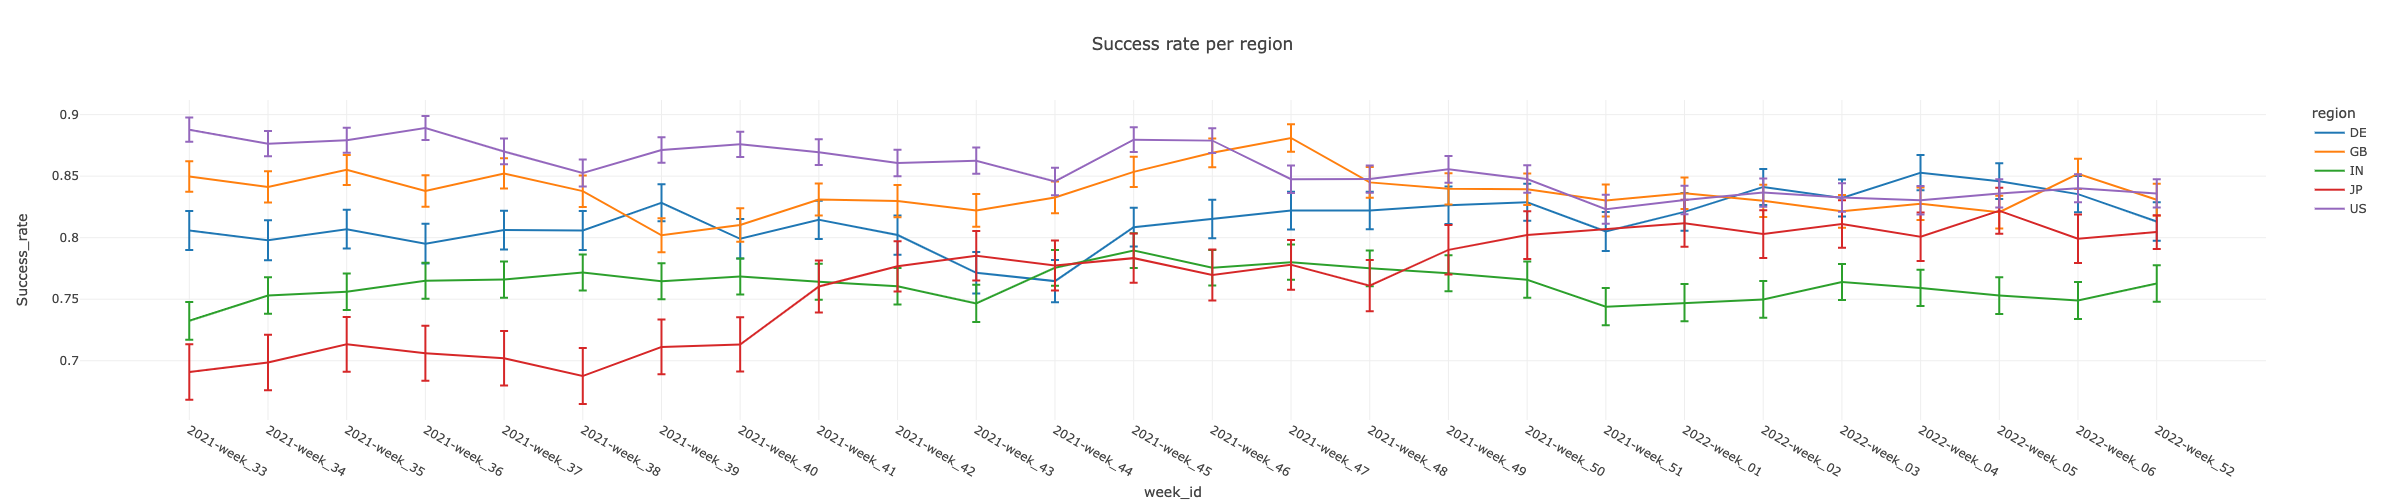

Produce the following requestser proportion graph:

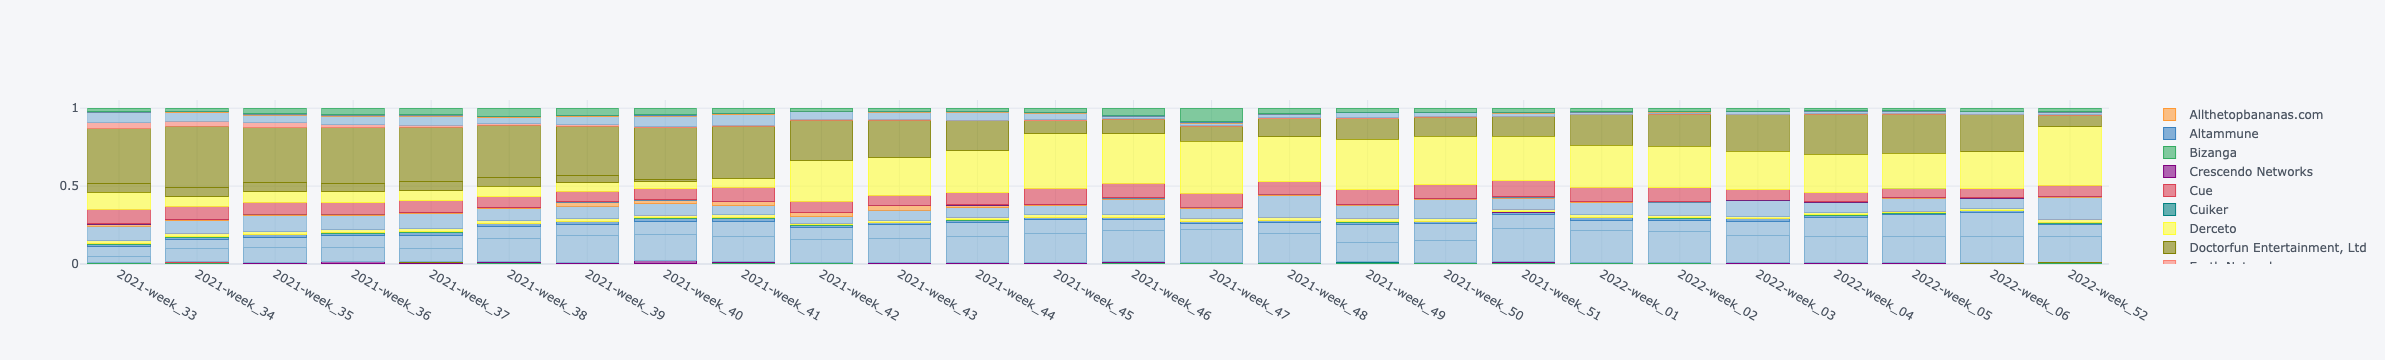

## Appendix

Code to create weekly files:

In [67]:
# for l in ad_recs_annotated.region.unique():
#     for w in ad_recs_annotated.week_id.unique():
#         w_id = w.split('_')[1]
#         y = w.split('-')[0]
#         query = f'week_id == "{w}" and region == "{l}"'
#         sample_f_name = f'{y}_{w_id}_{l}__Sample.csv'
#         ad_recs_annotated.query(query)[['week_id','ad_id','requester','region','recommendation_type', 'rec_provider']].to_csv(f'data/weekly/{sample_f_name}', index=False)
#         for s in ad_recs_annotated.recommendation_type.unique():
#             ann_f_name = f'{y}_{w_id}_{l}_{s}_annotation_result.csv'
#             query = f'week_id == "{w}" and region == "{l}" and recommendation_type == "{s}"'
#             sss = ad_recs_annotated.query(query)
#             if sss.empty:
#                 continue            
#             sss[['region','ad_id','is_success','is_sever']].drop_duplicates(subset=['ad_id']).to_csv(f'data/weekly/{ann_f_name}', index=False)